<a href="https://colab.research.google.com/github/Pareiollya/CALCULO_NUMERICO/blob/main/matodos_unidade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import sympy as sym 

gerar um grafico

In [ ]:
def showPlot(f, intervalo1, intervalo2):
  # Definir o intervalo
  x = np.linspace(intervalo1, intervalo2, 1000)

  # Calcular os valores da função para cada ponto no intervalo
  y = f(x)

  # Criar o gráfico
  plt.plot(x, y)
  plt.axhline(y=0, color='black', linestyle='--')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Gráfico da função f(x)')
  plt.show()

# Definir a função
# def f(x):
#     return x**3 - 9*x + 3
#     # return x**2 + x - 6

# showPlot(f)



FUNÇÃO e DERIVADA.

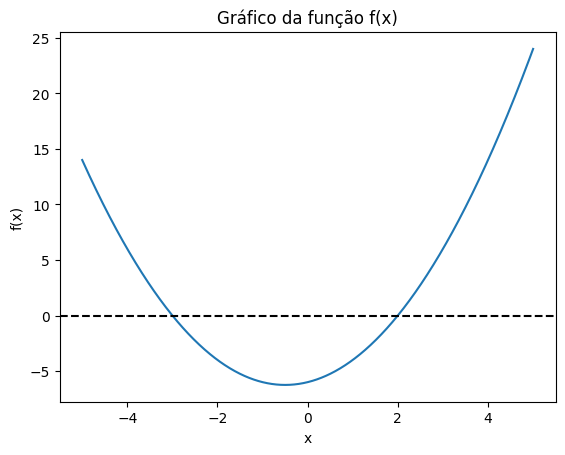

In [ ]:
def f(x):
    #  x**3 - 9*x + 3 
    return x**2 + x - 6  

def df(x):
    # 2*x + 1
    return  3*x**2 - 9


showPlot(f, -5, 5)

VARIÁVEIS GLOBAIS


In [ ]:
#pontos de intervalo
x0 = 1.5
x1 = 1.7

#configurações de iteração
tolerancia = 1e-6
max_iter = 100


.

#RAIZ DE EQUAÇÃO

In [ ]:
def showResult(result):
  for i in result:
    print(i)

CRITÉRIOS DE PARADA 

| f(c) | ou | x1 - x0 |

# -BISSEÇÃO

In [ ]:
def bissecao(f, a, b, tol = 1e-6, max_iter = 100, getResults = False):
    results = []
    iter = 0
    c = 0
    # if f(a) * f(b) >= 0:
    #     print(f"O método não convergiu em {max_iter} iterações, resultado {x1}")
    #     return None
    # while abs(f((a + b)/2) - f(c))> tol and iter < max_iter:
    while iter < max_iter:
        iter += 1
        c = (a + b)/2

        if(getResults): results.append((iter, c, f(c)))
        if f(c) == 0:
            return c, iter, 
        
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c

        if abs(f(c)) < tol:
          if(getResults): return c, iter, results
          else: return c, iter
    # print(f"A raiz aproximada da função é {c} com {iter} iterações.")

    
    

In [ ]:
def f(x):
    return x**3 - 9*x + 3 

x, i = bissecao(f, 0, 1, 1e-3, 100)
print(f"A raiz aproximada da função é {x} com {i} iterações.")

A raiz aproximada da função é 0.337646484375 com 12 iterações.


# -POSIÇÃO FALSA


.

In [ ]:
def posicao_falsa(f, a, b, tol = 1e-6, max_iter = 100, getResults = False):
    i = 0
    while i < max_iter:
        results = []
        i += 1
        fa = f(a)
        fb = f(b)
        c = (a*fb - b*fa) / (fb - fa)
        if(getResults): results.append((i, c, f(c)))
        if f(c) < tol:
            if(getResults): return c, i, results
            else: return c, i
            
        elif fa * f(c) < 0:
            b = c
        else:
            a = c
        
    raise Exception(f"O método não convergiu em {max_iter} iterações, resultado {x1}")

In [ ]:
def f(x):
    return x**3 - 9*x + 3 

x, i = posicao_falsa(f, 0, 1, 1e-3, 100)
print(f"A raiz aproximada da função é {x} com {i} iterações.")

A raiz aproximada da função é 0.375 com 1 iterações.


.

#-NEWTON


In [ ]:

def newton(f, df, x0, tol = 1e-6, max_iter = 100, getResults = False):
    i = 0
    results = []
    while i < max_iter:
        fx = f(x0)
        dfx = df(x0)
        x1 = x0 - fx / dfx
        i += 1
        if(getResults): results.append((i, x1, f(x1)))
        if abs(f(x1)) < tol:
          if(getResults): return x1, i, results 
          else: return x1, i
        x0 = x1
        
        
    raise Exception(f"O método não convergiu em {max_iter} iterações")


In [ ]:
#função para calcular derivada e retornar a derivada de uma função.
import sympy as sym 

def derivada (f, x):
  function_symbol = sym.Symbol('x')
  df = sym.diff(f, function_symbol)
  df_value = df.subs(function_symbol, x)

  print(f'Função derivada: {df}')

  return df_value

def derivada_aprox(f,x, h=1.9e-9):
    return (f(x+h) - f(x-h)) / (2*h)

#derivadas parciais

def f(x, y):
    return 9*x**2+25*y**2-255

def partial_derivada_aprox_x(f, x, y, h=1e-6):
    return (f(x+h, 0) - f(x-h, 0)) / (2*h)

def partial_derivada_aprox_y(f, x, y, h=1e-6):
    return (f(0, y+h) - f(0, y-h)) / (2*h)

partial_derivada_aprox_x(f,2.5,2)
partial_derivada_aprox_y(f,2.5,2)

100.00000000331966

In [ ]:

def newton_auto(f, x0, tol=1e-6, max_iter=100, getResults = False): #já com a derivada integrada, evitando-a como parâmetro
    results = []
    i = 0
    x = sym.Symbol('x')
    df = sym.diff(f(0,1), x)
    df_lambda = sym.lambdify(x, df)

    while i < max_iter:
        fx = f(x0)
        dfx = df_lambda(x0)
        x1 = x0 - fx / dfx
        # if abs(x1 - x0) < tol:
        i += 1
        if(getResults): results.append((i, x1, f(x1)))
        if abs(f(x1)) < tol:
          if(getResults): return x1, i, results 
          else: return x1, i
        x0 = x1
        
    raise Exception(f"O método não convergiu em {max_iter} iterações, resultado {x1}")

def newton_auto_aprox(f, x0, tol=1e-6, max_iter=100, getResults = False): #já com a derivada integrada por aproximação, evitando-a como parâmetro
    results = []
    i = 0
    while i < max_iter:
        x1 = x0 - f(x0) / derivada_aprox(f,x0, h=1e-6)
        i += 1
        if abs(f(x1)) < tol:
          if(getResults): return x1, i, results 
          else: return x1, i
        x0 = x1
       
    raise Exception(f"O método não convergiu em {max_iter} iterações, resultado {x1}")

In [ ]:
def f(x = 0, t = 0): #função modificada para funcionar com o método automatico
    if(t == 0):
      return x**3 - 9*x + 3 
    else:
      return 'x**3 - 9*x + 3'

def df(x):
    # 2*x + 1
   return  3*x**2 - 9

x, i = newton(f, df, 0)
print(f"A raiz aproximada da função é {x} com {i} iterações.")
print()

x, i = newton_auto(f, 0)
print(f"A raiz aproximada da função é {x} com {i} iterações.")

def f(x = 0, t = 0): #função modificada para funcionar com o método automatico
    if(t == 0):
      return 3.14 * x**2 - 1/3 * 3.14*x ** 3 - 0.5
    else:
      return '3.14 * x**2 -1/3 * 3.14*x ** 3 - 0.5'

def df(x):
  return 2*3.14*x - 3.14  * x**2
# newton_auto(f,0.375,0.01, 1)
# newton(f,df,0.375,0.01,100)
newton_auto(f,0.375,0.01,100)


A raiz aproximada da função é 0.3376089559653128 com 3 iterações.

A raiz aproximada da função é 0.3376089559653128 com 3 iterações.


(0.4343867385268659, 1)

.
.


#-SECANTE

In [ ]:
def secante(f, x0, x1, tol=1e-6, max_iter=100, getResults = False):
    """
    Encontra uma raiz da função f utilizando o método da secante
    a partir dos pontos iniciais x0 e x1
    """
    iter = 0
    results = []
    # while abs(x1 - x0) > tol and iter < max_iter:
    while iter < max_iter:
        iter += 1
        # Calcula o próximo ponto x2
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        # Atualiza os pontos x0 e x1
        if(getResults): results.append((iter, x1, f(x1)))
        if abs(f(x1)) < tol:
          if(getResults): return x1, iter, results 
          else: return x1, iter
        x0 = x1
        x1 = x2
        
        
    # if(getResults): return x1, iter, results 
    # else: return x1, iter
   

In [ ]:
def f(x):
  return 3.14 * x**2 - 1/3 * 3.14*x ** 3 - 0.5

secante(f,0.25,0.5,0.001,100, True)

(0.43124716857861556,
 4,
 [(1, 0.5, 0.15416666666666667),
  (2, 0.41873490006589065, -0.026282616883601784),
  (3, 0.4305712423641454, -0.0014198152571961442),
  (4, 0.43124716857861556, 1.5220623885925377e-05)])

In [ ]:
def f(x):
    return x**3 - 9*x + 3 

x, i = secante(f, 0, 1)
print(f"A raiz aproximada da função é {x} com {i} iterações.")

A raiz aproximada da função é 0.33760897287513775 com 5 iterações.


.

CONSTANTES
- math.e: a constante matemática e, aproximadamente igual a 2.718281828459045
- math.pi: a constante matemática pi, aproximadamente igual a 3.141592653589793

ANGULARES

- math.radians(angulo_graus) -> clacular grau radiano
- math.sin(x): retorna o seno do ângulo x.
- math.cos(x): retorna o cosseno do ângulo x.
- math.tan(x): retorna a tangente do ângulo x.
- math.asin(x): retorna o arco seno do valor x. O resultado é dado em radianos e está no intervalo [-π/2, π/2].
- math.acos(x): retorna o arco cosseno do valor x. O resultado é dado em radianos e está no intervalo [0, π].
- math.atan(x): retorna o arco tangente do valor x. O resultado é dado em radianos e está no intervalo [-π/2, π/2].
- math.atan2(y, x): retorna o arco tangente de y/x. O resultado é dado em radianos e está no intervalo [-π, π].

#ATIVIDADES 

In [ ]:
import numpy as np

def f(x):
    return x**3 - 9*x + 3 
def df(x):
    # 2*x + 1
   return  3*x**2 - 9

# Defina a função
x = sym.Symbol('x')
f = x**3 - 9*x + 3 

# Calcule a derivada em um ponto específico
df = sym.diff(f, x)
x0 = 3
df_value = df.subs(x, x0)

# Imprima o valor da derivada em um ponto específico
print(df_value)

def derivada (f, x):
  function_symbol = sym.Symbol('x')
  df = sym.diff(f, function_symbol)
  # print(df)
  df_value = df.subs(function_symbol, x)
  return df, df_value

f = 20000 * x - 24000

print(derivada(f, 0.1))

def df(x):
  return 20000

def f(i):
  a = ( i * ( 1 + i )**6)
  b = ( 1 + i )**6 - 1 
  c = a / b
  d = 20000 * c
  final = d - 4000
  return final
x, i = newton(f, df, 0.01, 0.000001, 1000000)
print(f"A raiz aproximada da função é {x} com {i} iterações.")


# f = 'cos(x)'
# derivada(f, 1)

f = '80 + 90 * cos( (3.14159265358979323846 / 3) * x) '
função, resultado = derivada(f, 1)

print(função)



18
(20000, 20000)
A raiz aproximada da função é 0.054717924990814536 com 21 iterações.
-94.2477796076937971538*sin(1.04719755119659774615*x)


calcular radiano caso haja um coseno

In [ ]:
# def cos1(x):
#   return m.cos(m.pi / 3 * x)
# def sin1(x):
#   return m.sin(m.pi / 3 * x)

# print(cos1(3.454437353))
# print(sin1(3.454437353))
# print(3.454437353 - (80 + (90* -0.88888731) ) / (-94.247 * -0.45812589))
# print((3.454437 - 3.454434) < 0.001)

def f(x):
  return 80 + 90 * m.cos ( (3.141592653589793/3) * x)

f2 = '80 + 90 * cos( (3.141592653589793/3) * x)'
print(derivada(f2,4))

derivada_aprox(f,4,1e-12)



(-94.24777960769379*sin(1.047197551196598*x), 81.62097139053978)


81.62004405676271

In [ ]:
def f(x):
  # 10 - 20 * (m.e**0.2*x - m.e**-0.75*x)
  return 10 - 20 * (m.e**0.2*x - m.e**-0.75*x)

f(0.5625)
# (0.375 + 0.75) / 2 2.718281828459045

m.e
def f(x , t = 0): #função modificada para funcionar com o método automatico
    if(t == 0):
      return  10 - 20 * (2.718281828459045**0.2*x - 2.718281828459045**-0.75*x) 
    else:
      return '10 - 20 * (2.718281828459045**0.2*x - 2.718281828459045**-0.75*x)'

print(newton_auto(f, 4,0.001,max_iter=100))
newton_auto_aprox(f,4,tol=0.001)

x, i = bissecao(f, 0, 3, 0.0000000001, 1000)
print(f"Raiz aproximada: {x}, {i} iterações.")

x, i, result = posicao_falsa(f, 0, 3, 0.0000000001, 1000, True)
print(f"Raiz aproximada: {x}, {i} iterações.")

x, i, result = secante(f, 0, 3, 0.0000000001, 1000, True)
print(f"Raiz aproximada: {x}, {i} iterações.")

x, i = newton_auto(f, 1.5, 0.0000000001, 1000)

print(f"Raiz aproximada: {x}, {i} iterações.")
showResult(result)

(0.6675244752958287, 1)
Raiz aproximada: 0.6675244752987055, 36 iterações.
Raiz aproximada: 0.6675244752958286, 1 iterações.
Raiz aproximada: 0.6675244752958283, 2 iterações.
Raiz aproximada: 0.6675244752958285, 1 iterações.
(1, 3, -34.94217232514931)
(2, 0.6675244752958283, 3.552713678800501e-15)


sistemas lineares adição, substituição, escalonamento e cramer, gauss jacobi (indireto)


#SISTEMAS LINEARES

# -CRAMER

In [ ]:
def determinante(A, b):
  size = len(b)
  # Definindo a matriz dos coeficientes
  # A = np.array([[40,-40,0], [-1/4000,40,-1], [1,1,1]])

  # Definindo o vetor constante
  # b = np.array([15,-1/4000,60])

  # Calculando o determinante da matriz dos coeficientes
  detA = np.linalg.det(A)
  # Calculando os determinantes secundários
  
  if(size >= 1): 
    detAx = np.linalg.det(np.column_stack((b, A[:, 1:])))
    x = detAx / detA
    if(size == 1): 
      return x

  if(size >= 2):
    detAy = np.linalg.det(np.column_stack((A[:, 0],b, A[:, 2:])))
    y = detAy / detA
    if(size == 2): 
      return x, y

  if(size >= 3):
     detAz = np.linalg.det(np.column_stack((A[:, 0],A[:, 1], b, A[:,3:])))
     z = detAz / detA
     if(size == 3): 
       return x, y, z

  if(size >= 4):
    detAw = np.linalg.det(np.column_stack((A[:, 0],A[:, 1], A[:,2], b, A[:,4:])))
    w = detAw / detA
    if(size == 4): 
      return x, y, z, w

  if(size == 5):
    detAk = np.linalg.det(np.column_stack((A[:, 0],A[:, 1],  A[:,2], A[:, 3], b)))
    k = detAk / detA
    if(size == 5): 
      return x, y, z, w, k

  

In [ ]:
A = np.array([[80, 0, 30, 10], [0, 80, 10, 10], [16, 20, 60, 70], [4, 0, 0, 8]])
b = np.array([40, 27, 31, 2])

A = np.array([[80, 0, 30, 10,0], [0, 80, 10, 10,0], [16, 20, 60, 70,0], [4, 0, 0, 8,0], [1,2,3,4,5]])
b = np.array([40, 27, 31, 2, 0])

print(np.column_stack((A[:, 0],A[:, 1],  A[:,2], A[:, 3], b)))
print(determinante(A,b))

# A = np.array([[80, 0], [0, 80]])
# b = np.array([40, 27])

# print(determinante(A,b,len(b)))

[[80  0 30 10 40]
 [ 0 80 10 10 27]
 [16 20 60 70 31]
 [ 4  0  0  8  2]
 [ 1  2  3  4  0]]
(0.3993808049535603, 0.29976780185758517, 0.2515479876160992, 0.0503095975232198, -0.3909597523219815)


#-ITERATIVO DE GAUSS


In [ ]:
import numpy as np

def gauss(A, b, x0, tol=1e-6, max_iter=1000):
    n = len(A)
    x = x0.copy()
    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            s = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i, i]
        if np.linalg.norm(x - x_new) < tol:
            return x_new
        x = x_new
    return x

In [ ]:
A = np.array([[11.2, 21, 2.75], [34.6, 16.7, 7], [25.2, 12.3, 71]])
b = np.array([27,56,81])
chute = np.array([1,0,0])
gauss(A, b, chute, max_iter = 2)
# x = gauss(A, b, maxiter = 100)
# print(x)

array([-0.18495065, -1.97078579,  0.06321582])

In [ ]:
1/16.7 * (55 - 34.6 )

1.2215568862275448

TESTES

In [ ]:
import sympy as sp

# Definindo as variáveis do sistema
x, y = sp.symbols('x y')

# Definindo a função que descreve o sistema
f1 = x**4 + 0.06823*x - y**4 - 0.05848*y
f2 = x**4 + 0.08848*x - 2*y**4 - 0.11696*y

# Calculando o jacobiano
J = sp.Matrix([f1, f2]).jacobian([x, y])
K = J * sp.Matrix([-0.01509, 0])
# Imprimindo o jacobiano
x_value = 100
y_value = 0
J_sub = K.subs([(x, x_value), (y, y_value)])

print(J)
print(J_sub)

Matrix([[4*x**3 + 0.06823, -4*y**3 - 0.05848], [4*x**3 + 0.08848, -8*y**3 - 0.11696]])
Matrix([[-60360.0010295907], [-60360.0013351632]])


In [ ]:
import numpy as np
import sympy as sp

# Definindo as variáveis do sistema
x, y = sp.symbols('x y')

# Definindo as funções que descrevem o sistema
f1 = x**4 + 0.06823*x - y**4 - 0.05848*y
f2 = x**4 + 0.08848*x - 2*y**4 - 0.11696*y

# Definindo as derivadas parciais das funções
df1dx = sp.diff(f1, x)
df1dy = sp.diff(f1, y)
df2dx = sp.diff(f2, x)
df2dy = sp.diff(f2, y)

# Definindo a matriz jacobiana
J = sp.Matrix([[df1dx, df1dy], [df2dx, df2dy]])
J
# # Definindo a função que aplica o método de Newton
# def newton_system(F, J, x0, tol=1e-5, max_iter=100):
#     x = x0
#     for i in range(max_iter):
#         F_val = F.subs({x[0]: x_val[0], x[1]: x_val[1]})
#         if np.linalg.norm(F_val) < tol:
#             return x
#         J_val = np.array(J(x)).astype(float)
#         x = x - np.linalg.solve(J_val, F_val)
#     return x

# # Definindo a função F como um vetor das funções que descrevem o sistema
# F = sp.Matrix([f1, f2]).T

# # Definindo o ponto inicial
# x0 = np.array([1.5, 0.5])

# # Aplicando o método de Newton
# sol = newton_system(F, J, x0)

# # Imprimindo a solução
# print(sol)

Matrix([
[4*x**3 + 0.06823, -4*y**3 - 0.05848],
[4*x**3 + 0.08848, -8*y**3 - 0.11696]])

# -NEWTON NAO LINEAR




In [ ]:
import sympy as sp

# Definindo as variáveis do sistema
x, y = sp.symbols('x y')

# Definindo as funções que descrevem o sistema
f1 = x + 2 * y - 3
f2 = 3*x**2 + y**2 - 7

# f1 = x**4 + 0.06823*x - y**4 - 0.05848*y 
# f2 = x**4 + 0.05848*x - 2*y**4 - 0.11696*y

# Calculando o jacobiano das funções
J = sp.Matrix([[sp.diff(f, var) for var in [x, y]] for f in [f1, f2]])

# Definindo a matriz A e o vetor b
A = J.subs([(x, 1), (y, 1)])
A = np.array(A.tolist(), dtype=float).reshape(A.shape)

b = sp.Matrix([-f1.subs([(x, 1), (y, 1)]), -f2.subs([(x, 1), (y, 1)])])
b = np.array(b.tolist(), dtype=float).reshape(b.shape)
x0 = np.array([1,1])

print(J)
print(A)
print(b)
# print(gauss(A, b, x0, max_iter = 1))

# determinante(A,b)

Matrix([[1, 2], [6*x, 2*y]])
[[1. 2.]
 [6. 2.]]
[[0.]
 [3.]]


In [ ]:
from numpy.linalg import inv

def newton_raphson(f, J, x0, eps=1e-6, max_iter=100):
    x = np.array(x0, dtype=np.float64)
    for i in range(max_iter):
        f_val = f(x)
        J_val = J(x)
        delta_x = inv(J_val).dot(-f_val)
        x = x + delta_x

        if np.linalg.norm(delta_x) < eps:
            return x

    return x

  # Define as funções f1 e f2 e calcula a matriz jacobiana J

#   x[0] = x, x[1] = y, x[2] = z
def f(x):
    return np.array([x[0] + 2*x[1] - 3, 3*x[0]**2 + x[1]**2 -7])

def J(x):
    return np.array([[1,2], [6*x[0], 2*x[1]]])

# Define as estimativas iniciais das raízes
x0 = [1,1]

# Chama a função de Newton-Raphson
x = newton_raphson(f, J, x0, max_iter = 1)
x

array([1.6, 0.7])